In [1]:
#THIS IS SPECIFICALLY USED TO CONVERT AN SQL TABLE TO CSV
#DO NOT RUN OTHERWISE, IT WILL EAT UP YOUR RAM USAGE
# %run DBConnector.ipynb
# con = SQLConnector('trauma2017.db')
# con.to_pickle("PUF_TRAUMA")

Getting PUF_TRAUMA Table
New pickel created: PUF_TRAUMA.pickle


In [1]:
%run DataProcessing.ipynb


#Load Data using DataProcessing Model:
#Helper functions: get_xy(), get_ds(), get_paramgrid()

dp = DataProcess('PUF_TRAUMA.pickle')
X, y = dp.get_xy('ISS_05') 

#This is if you want to extract data from the sql
# dp = DataProcess('trauma2017.db')
# X, y = dp.get_sql_xy('PUF_TRAUMA', 'ISS_05', [8, 15, 25])



In [9]:
def find_missingness(threshold):
    info = []
    high_null = []
    row_count = len(X)
    for col in X.columns:
        na_values = X[col].isna().sum()
        percent_col = na_values/row_count
        row = [col, percent_col, na_values, row_count]
        if percent_col < threshold:
            info.append(row)
        else:
            info.append(row)
            high_null.append(row) 
    return high_null, info

In [10]:
nulls, info = find_missingness(0.75)

In [11]:
for null in nulls:
    print(null)

['SEX_BIU', 0.9998496948806076, 997820, 997970]
['ETHNICITY_BIU', 0.950196899706404, 948268, 997970]
['WORKRELATED_BIU', 0.9896560016834174, 987647, 997970]
['PTOCCUPATIONALINDUSTRY', 0.96763028948766, 965666, 997970]
['PATIENTSOCCUPATION', 0.9682685852280128, 966303, 997970]
['PRIMARYECODEICD10_BIU', 0.9988546749902302, 996827, 997970]
['PLACEOFINJURYCODE_BIU', 0.9874064350631783, 985402, 997970]
['ADDITIONALECODEICD10', 0.9410142589456597, 939104, 997970]
['CHILDSPECIFICRESTRAINT', 0.9975540346904216, 995529, 997970]
['ABUSEREPORT_BIU', 0.981807068348748, 979814, 997970]
['ABUSEINVESTIGATION', 0.9464853652915418, 944564, 997970]
['CAREGIVERATDISCHARGE', 0.9659719230036975, 964011, 997970]
['TRANSPORTMODE_BIU', 0.9925148050542602, 990500, 997970]
['INTERFACILITYTRANSFER_BIU', 0.9999478942252773, 997918, 997970]
['PREHOSPITALCARDIACARREST_BIU', 0.9616902311692737, 959738, 997970]
['SBP_BIU', 0.965508983235969, 963549, 997970]
['PULSERATE_BIU', 0.9766756515726925, 974693, 997970]
['TEMP

In [12]:
percents = [item[1] for item in info]

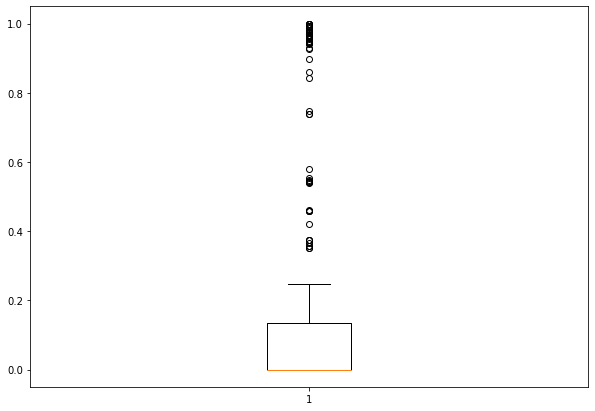

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))

plt.boxplot(percents)
plt.show()

In [5]:
high_null = sorted(high_null, key=lambda x: x[1])
for row in high_null:
    print(row)

Columns with a high amount of Null values:
    ETHNICITY_BIU - 95%
    WORKRELATED_BIU - 98%
    PTOCCUPATIONALINDUSTRY - 96%
    PATIENTSOCCUPATION - 

In [29]:
%run HyperParameterTuning.ipynb
#Tune classifier for best parameters using HyperParameterTuning:
#Helper functions: get_prefix(), get_best
tune = HyperParameterTuning('hyper_parameter')
prefix = tune.get_prefix() #file prefix for continuity

clfs, params, sen_arr, spec_arr, thresh_arr, cf_matrix_arr = tune.gridSearchCustom(dp.get_paramgrid(), X, y, True)
#get data for the classifier with the highest specificity
best_clf, best_params, best_sen, best_spec, best_thresh, best_conf_matrix, y_data = tune.get_best()





{'min_samples_split': 25, 'max_depth': 17, 'max_leaf_nodes': 75}


ValueError: could not convert string to float: 'Female'

In [57]:
%run Statistics.ipynb

#Process data for statistics using Statistics model:
stats = Statistics('statistics', prefix)
stats.get_stats(spec_arr, params)
# stats.import_stats("2022-10-26-v1-Mean.csv")
print(stats.get_last())

                                          parameters  specificty mean  \
0  {'min_samples_split': 25, 'max_depth': 17, 'ma...         0.531900   
1  {'min_samples_split': 25, 'max_depth': 17, 'ma...         0.538667   
2  {'min_samples_split': 25, 'max_depth': 17, 'ma...         0.539889   
3  {'min_samples_split': 25, 'max_depth': 25, 'ma...         0.531900   
4  {'min_samples_split': 25, 'max_depth': 25, 'ma...         0.538667   
5  {'min_samples_split': 25, 'max_depth': 25, 'ma...         0.539889   

   specificty variance  specificty standard dev  
0             0.000017                 0.004085  
1             0.000023                 0.004807  
2             0.000045                 0.006691  
3             0.000017                 0.004085  
4             0.000023                 0.004807  
5             0.000045                 0.006691  


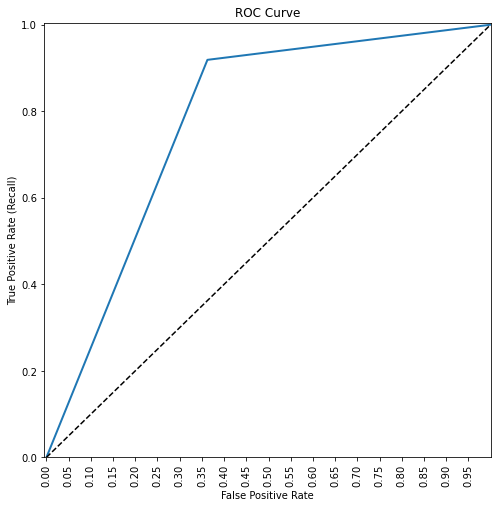

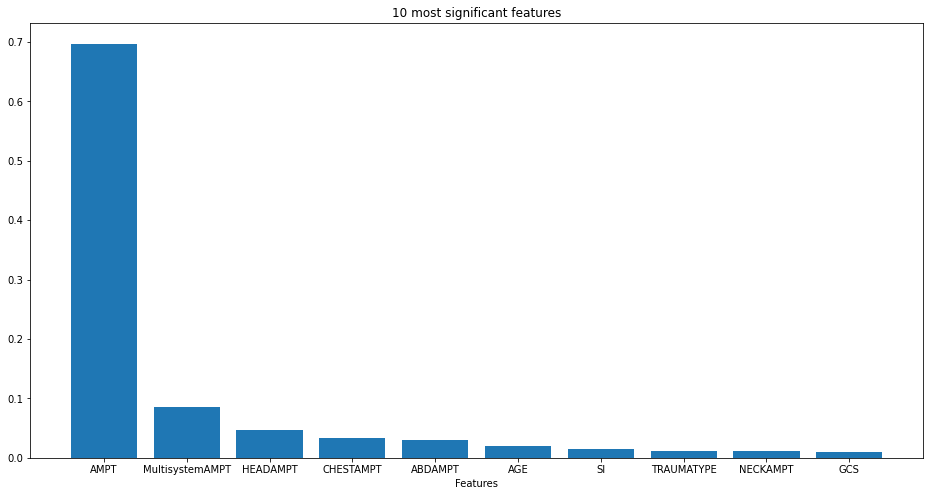

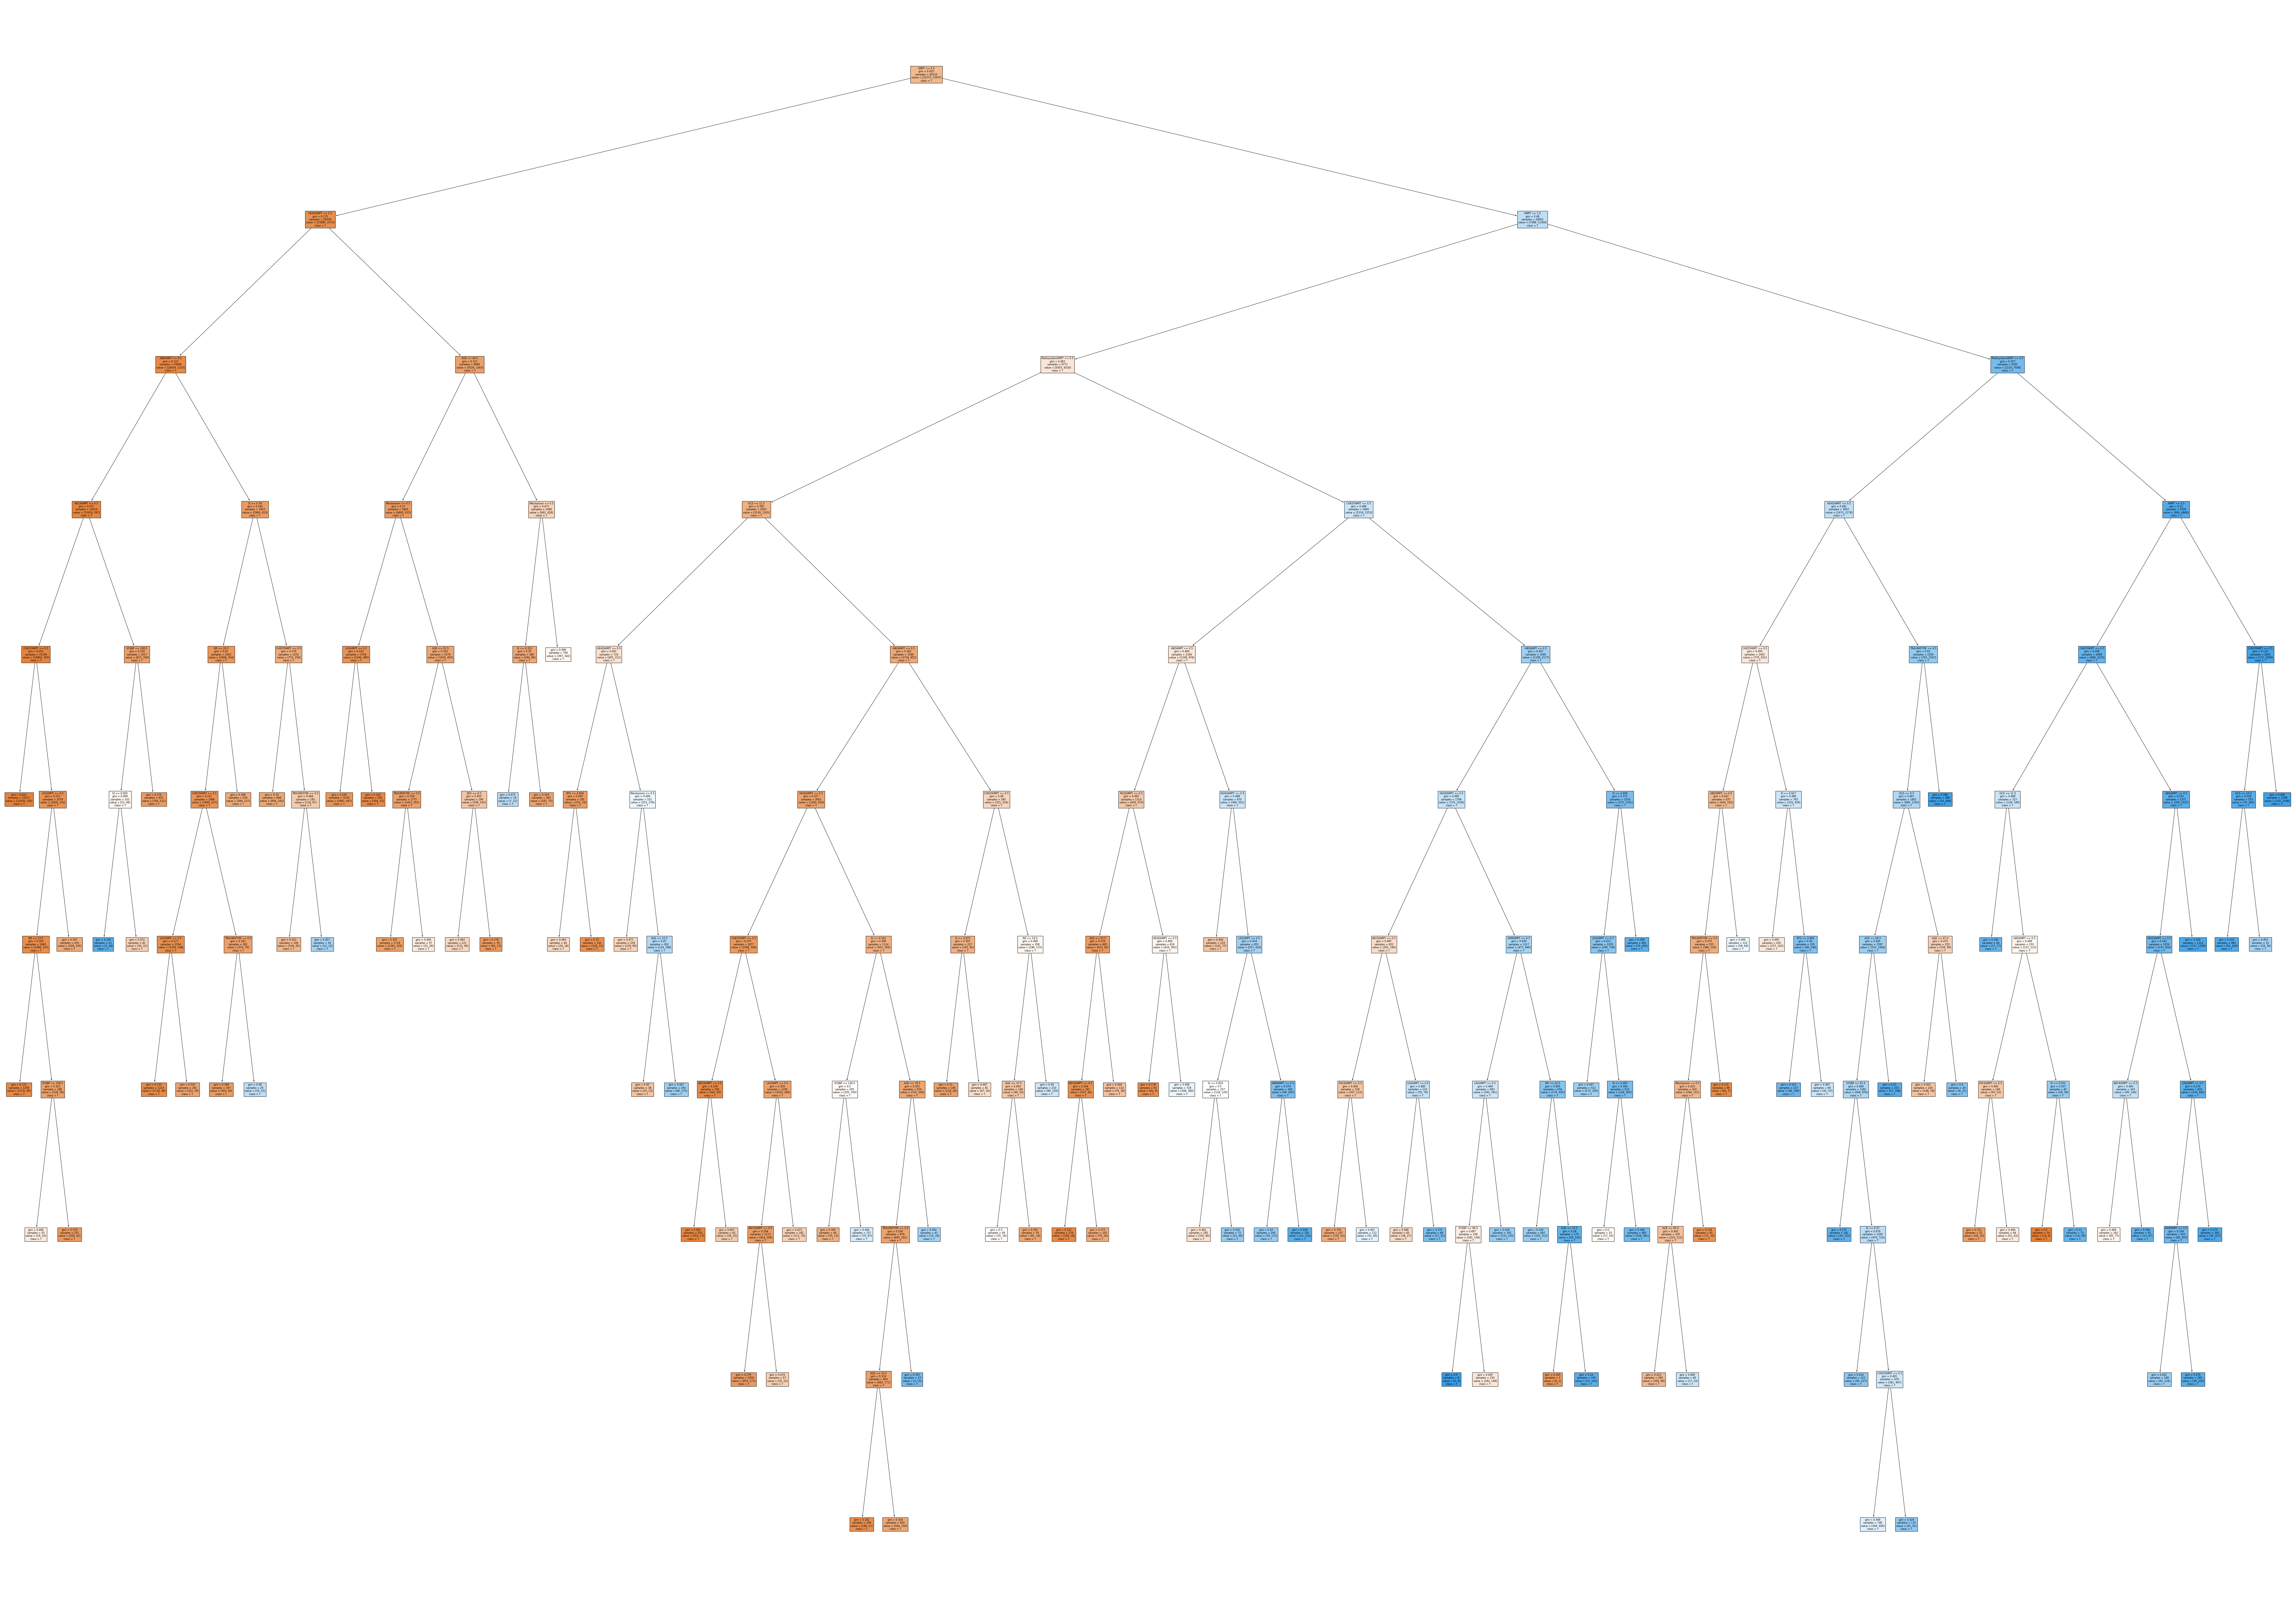

In [26]:
%run visualization.ipynb

#Display graphs using Visualization Model:
#Graph types: sen_spe_plt(sensitivity, specificity, threshold), roc_curve_plt(test, pred), ccp_plt(clf_arr, alpha_arr, test)
#feature_sig_plt(clf, dataset, num_desired_features), tree_plt(clf, dataset)
vis = Visualize('figures', prefix)

# vis.sen_spe_plt(best_sen, best_spec, best_thresh)
vis.roc_curve_plt(y_data[0], y_data[1])
vis.feature_sig_plt(best_clf, dp.get_ds(), 10) #Plt of 10 most impactful features
vis.tree_plt(best_clf, dp.get_ds())

In [18]:
%run Interface.ipynb
gui = interface()
gui.generate_buttons()